# Heart Disease Prediction:
In this project I will classify wehther a person have Heart disease or not by simply observing dataset that uses 14 features such as gender, age, cp (chest pain type), cholesterol level, fasting blood sugar level, exercise-induced angina, maximum achieved heart rate (thalach), maximum achieved heart rate(thal), and the number of major vessels.
There are Six Risk Factors that Causes Heart Diseases.

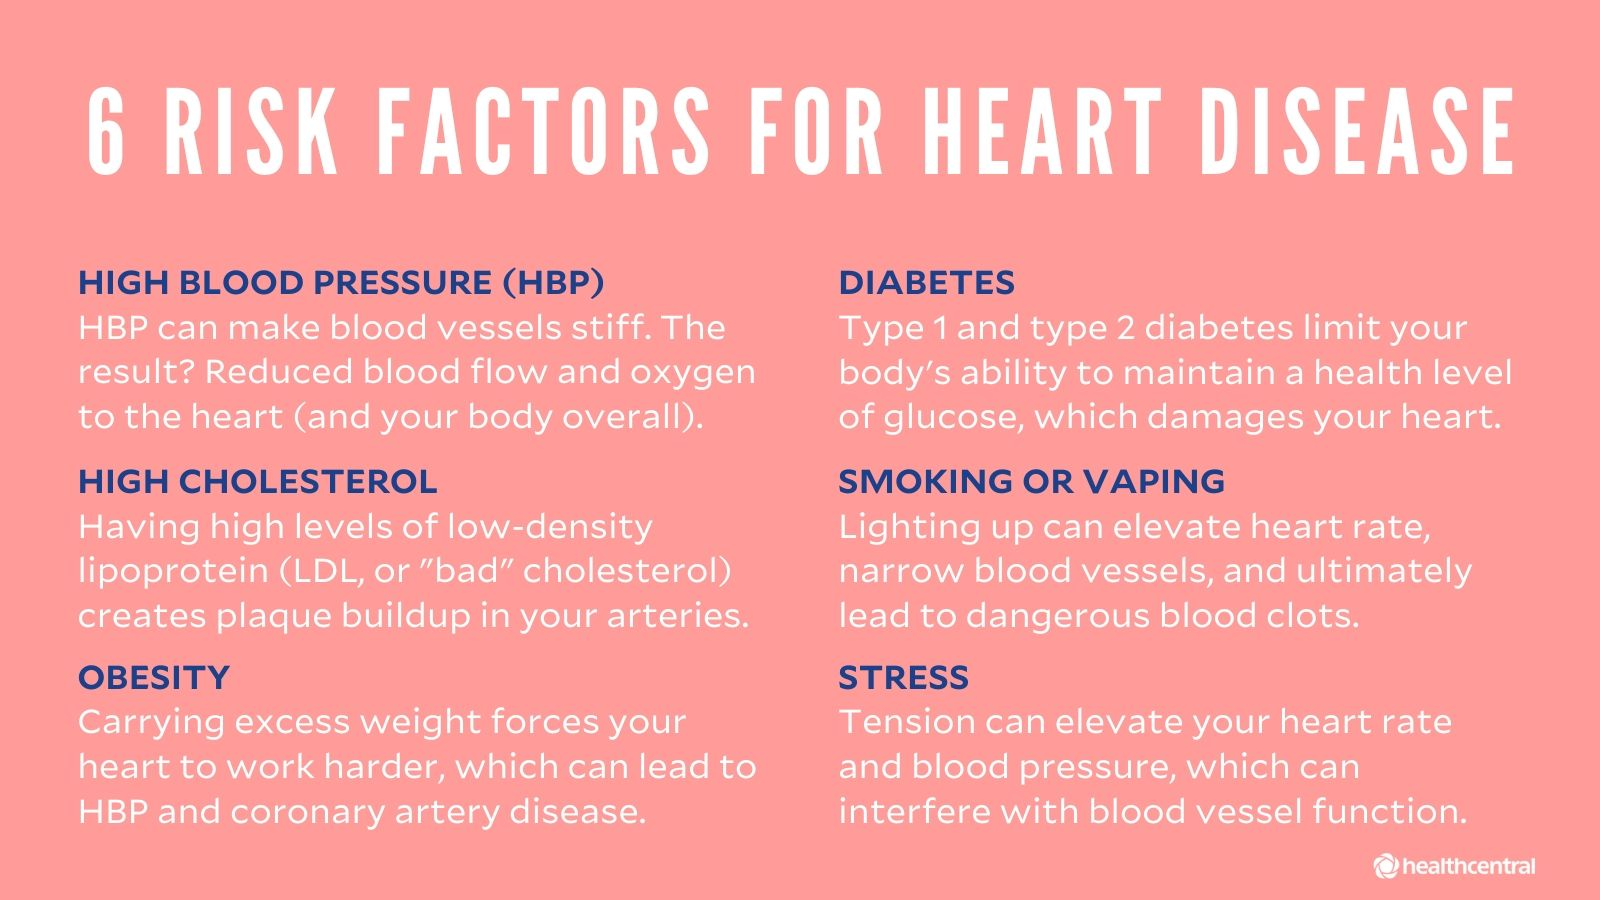

We will use Classification model because we have to classify whether a person has diseese or not!
Here are the steps the way this project will be processed
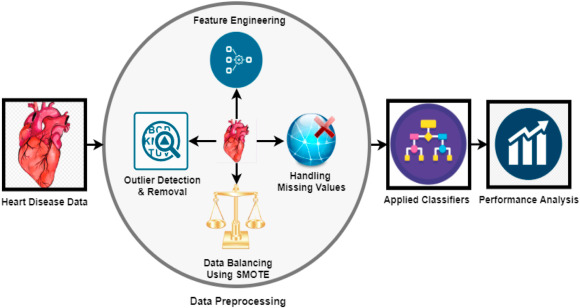


# Libraries

In [3]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score




# Loading data

In [4]:
df = pd.read_csv("heart dataset.csv") # 'DataFrame' shortened to 'df'
df.info() # (rows, columns)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Here are 14 columns where 13 columns are integers and one column(oldpeak) is in float because it's continuous variable!
Now we will check every type of null values in data

# EDA

In [ ]:
# Check all possible null or abnormal values in one go
nulls = df.isnull().sum()
empty_strings = (df == '').sum()


print("Standard Null Values:\n", nulls)
print("Empty Strings:\n", empty_strings)


In [6]:
# Check unique values in each suspected categorical column
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    print(f"{col} unique values:", df[col].unique())


sex unique values: [1 0]
cp unique values: [3 2 1 0]
fbs unique values: [1 0]
restecg unique values: [0 1 2]
exang unique values: [0 1]
slope unique values: [0 2 1]
ca unique values: [0 2 1 3 4]
thal unique values: [1 2 3 0]


Every columns defined in different categorical values for example 


Chest Pain Type (cp):

0: Typical angina: Chest pain that means the heart isn't getting enough blood.


1: Atypical angina: Chest pain that isn't related to the heart.


2: Non-anginal pain: Chest pain that feels like something else, like a stomach problem.


3: Asymptomatic: No chest pain and no signs of heart problems.

In [7]:
# Count the occurrences of each unique value in the target column
value_counts = df['target'].value_counts()
print("Counts of each unique value in target column:\n", value_counts)


Counts of each unique value in target column:
 1    165
0    138
Name: target, dtype: int64


In [8]:
# Create a pivot table to summarize the target frequency by 'cp'
pivot_table = df.pivot_table(index='cp', columns='target', aggfunc='size', fill_value=0)
print(pivot_table)


target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16


**Relations**:The table shows a clear association between chest pain types and the likelihood of heart disease. For instance, cp = 2 (Non-anginal pain) has the highest number of patients with heart disease, while cp = 0 (Typical angina) has the highest number of patients without heart disease, further we can watch clearly by visualization.

<Figure size 1000x600 with 0 Axes>

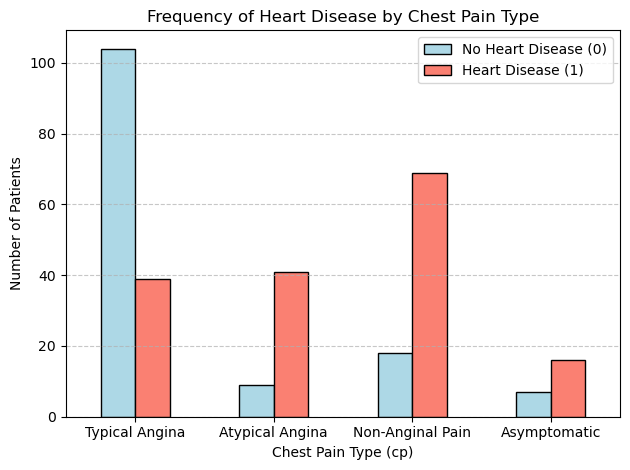

In [9]:
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', color=['lightblue', 'salmon'], edgecolor='black')
plt.title('Frequency of Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Number of Patients')
plt.xticks(ticks=range(len(pivot_table.index)), labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'], rotation=0)
plt.legend(['No Heart Disease (0)', 'Heart Disease (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Let's see outliers

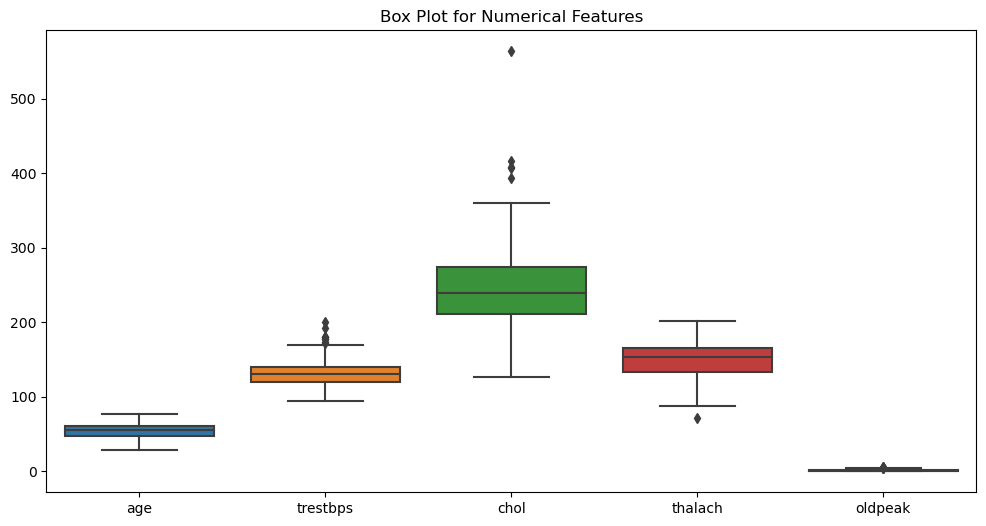

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title('Box Plot for Numerical Features')
plt.show()



# Cholesterol vs Max Heart Rate

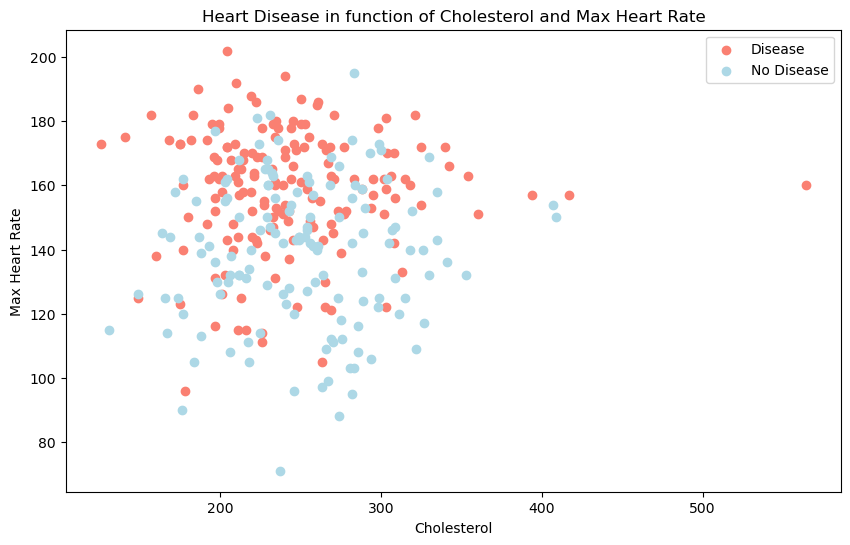

In [41]:
plt.figure(figsize=(10, 6))

# Positive examples (heart disease)
plt.scatter(df.chol[df.target == 1],
            df.thalach[df.target == 1],
            c="salmon")

# Negative examples (no heart disease)
plt.scatter(df.chol[df.target == 0],
            df.thalach[df.target == 0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Cholesterol and Max Heart Rate")
plt.xlabel("Cholesterol")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.show()


# Feature Importance

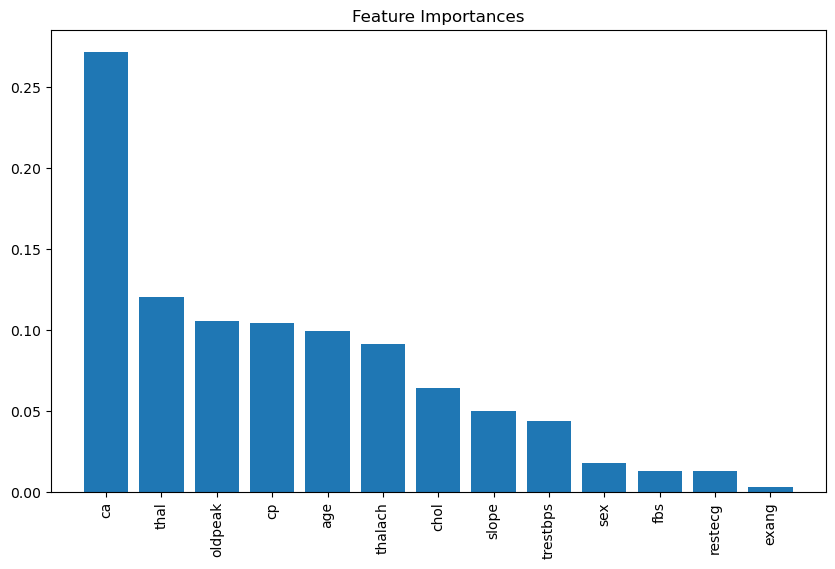

In [42]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


# Decision Tree Classifier
After Exploring Data We will use Decion Tree classifier model so let's start with splitting data

In [11]:
X = df.drop('target', axis=1)
y = df['target']

In [12]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [13]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2


I have Splitted data into 75% training and 25% testing now we will import Decision Tree Classifier

In [25]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# Predicting Model

In [28]:
y_pred = model.predict(X_test)

# Evaluating Model

In [39]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        35
           1       0.82      0.80      0.81        41

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



**Interpretation**: The model has an overall accuracy of 80%, with balanced precision, recall, and F1-scores for both classes. This suggests the model performs well in identifying both the presence and absence of heart disease with similar effectiveness.

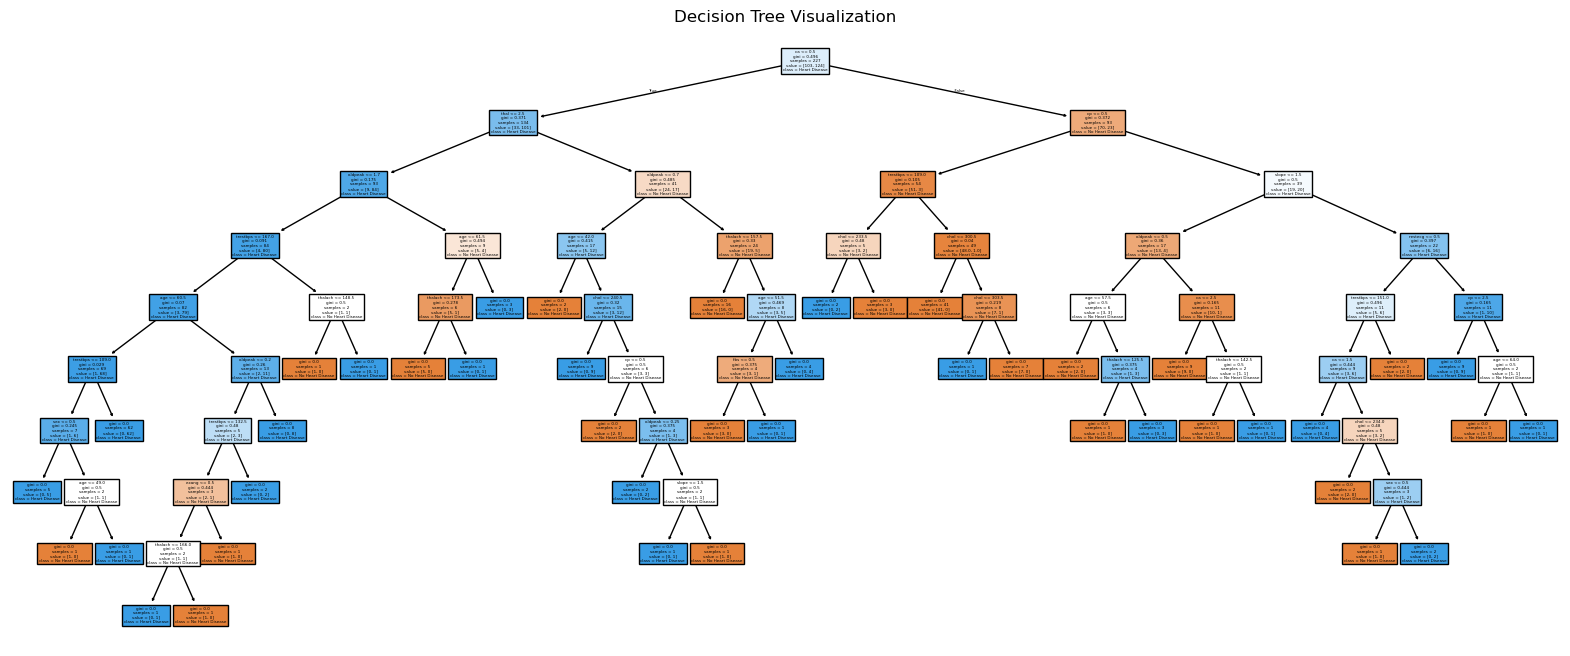

In [33]:
# Step 6: Visualizing the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,8))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'])
plt.title('Decision Tree Visualization')
plt.show()


# Logistic Regression 

In [37]:


# Define and Train the Logistic Regression Model
Log_model = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter if needed for convergence
Log_model.fit(X_train, y_train)

# Making Predictions
y_pred_log_reg = Log_model.predict(X_test)

#  Evaluating the Model
print("Logistic Regression Model Evaluation:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_log_reg))




Logistic Regression Model Evaluation:
[[28  7]
 [ 8 33]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



C:\Users\Haeir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


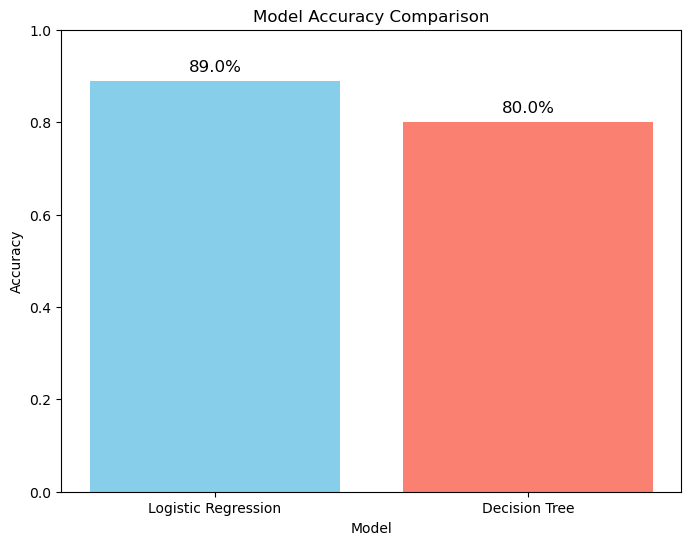

In [40]:
import matplotlib.pyplot as plt

# Define model names and their respective accuracies
model_names = ['Logistic Regression', 'Decision Tree']
accuracies = [0.89, 0.80]  # Accuracy values for each model

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'salmon'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for percentages

# Annotate the accuracy values on top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc*100:.1f}%', ha='center', fontsize=12)

plt.show()


# Classification Reports Comparison:
**Precision**:

For class 0 (no disease), Logistic Regression scored 0.91 vs. Decision Tree’s 0.78.

For class 1 (disease), Logistic Regression scored 0.88 vs. Decision Tree’s 0.82.

**Recall**:
Logistic Regression achieved 0.86 for class 0 and 0.93 for class 1.

Decision Tree achieved 0.80 for both classes.

**F1-Score**:

Logistic Regression has a higher F1-score for both classes, averaging 0.89, while the Decision Tree averages 0.80.

**Conclusion**: Logistic Regression appears to be the better model for this dataset. It is more effective at predicting both the presence and absence of heart disease, with fewer misclassifications and higher overall metrics.
